In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Paths to data files
train_csv = os.path.expanduser("data/df_cleaned_20250617.csv")
test_csv  = "data/st_vgp_pois_constmean_t400r300_test_predictions.csv"

# Load and preprocess training data
df_train = pd.read_csv(train_csv, parse_dates=['timestamp'])
df_train = df_train.dropna(subset=['ground_truth'])  # only actual observations

# Load prediction results
df_test = pd.read_csv(test_csv, parse_dates=['timestamp'])

/var/folders/y6/z9h695vx2w3gbjh7z32h4j9m0000gn/T/ipykernel_72116/1167199628.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_test = pd.read_csv(test_csv, parse_dates=['timestamp'])


In [284]:
# Convert the seconds‐since‐epoch column to datetime
df_test['timestamp'] = pd.to_datetime(df_test['timestamp'], unit='s').dt.date

# Make sure both dataframes have the same date format
df_train['timestamp'] = pd.to_datetime(df_train['timestamp']).dt.date

# Rename columns for consistency
df_train.rename(columns={'ground_truth': 'count'}, inplace=True)
df_test.rename(columns={'pred_mean_Y': 'count','pred_var_Y':'var','rate_median':'median','rate_lower95':'lower95','rate_upper95':'upper95','rate_lower90':'lower90','rate_upper90':'upper90'}, inplace=True)

# Add a 'category' column to distinguish between training and prediction data
df_train['category'] = 'train'
df_test['category'] = 'prediction'

# Create a empty columns to combine two dataframes
df_train['median'] = np.nan
df_train['var'] = np.nan
df_train['lower95'] = np.nan
df_train['upper95'] = np.nan
df_train['lower90'] = np.nan
df_train['upper90'] = np.nan

# Combine the two dataframes
df_combined = pd.concat([df_train, df_test], ignore_index=True)

/var/folders/y6/z9h695vx2w3gbjh7z32h4j9m0000gn/T/ipykernel_72116/2344571355.py:2: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df_test['timestamp'] = pd.to_datetime(df_test['timestamp'], unit='s').dt.date


In [285]:
df_combined.head()

,timestamp,bboxid,GEOID,geometry_bbox,center_latlon,max,min,precipitation,total_population,white_ratio,black_ratio,hh_median_income,count,category,median,var,lower95,upper95,lower90,upper90,ground_truth,latitude,longitude
0,2016-11-09,bbox_10_14,60750604002,POLYGON ((-122.4862707014277 37.71914041535512...,"(37.71986168151697, -122.48535268128838)",73.0,58.0,0.0,506,0.806324,0.000000,53438.0,0.0,train,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-11-10,bbox_10_14,60750604002,POLYGON ((-122.4862707014277 37.71914041535512...,"(37.71986168151697, -122.48535268128838)",74.0,60.0,0.0,506,0.806324,0.000000,53438.0,0.0,train,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-11-10,bbox_10_15,60750332043,POLYGON ((-122.48444469610592 37.7191324443233...,"(37.71985369613769, -122.4835266585265)",74.0,60.0,0.0,1852,0.266199,0.075054,77813.0,0.0,train,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-11-09,bbox_10_16,60750332043,POLYGON ((-122.48261869150517 37.7191244450116...,"(37.719845682477825, -122.48170063648698)",73.0,58.0,0.0,1852,0.266199,0.075054,77813.0,0.0,train,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-11-10,bbox_10_16,60750332043,POLYGON ((-122.48261869150517 37.7191244450116...,"(37.719845682477825, -122.48170063648698)",74.0,60.0,0.0,1852,0.266199,0.075054,77813.0,0.0,train,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [286]:
# Needed columns
needed_columns = ['timestamp', 'bboxid','GEOID', 'count', 'median', 'var', 'lower95', 'upper95', 'lower90', 'upper90', 'category']
df_combined = df_combined[needed_columns]

# # Fill Nan values with count values of each row
df_combined['median'].fillna(df_combined['count'], inplace=True)
df_combined['var'].fillna(0, inplace=True)
df_combined['lower95'].fillna(df_combined['count'], inplace=True)
df_combined['upper95'].fillna(df_combined['count'], inplace=True)
df_combined['lower90'].fillna(df_combined['count'], inplace=True)
df_combined['upper90'].fillna(df_combined['count'], inplace=True)

/var/folders/y6/z9h695vx2w3gbjh7z32h4j9m0000gn/T/ipykernel_72116/1460359239.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_combined['median'].fillna(df_combined['count'], inplace=True)
/var/folders/y6/z9h695vx2w3gbjh7z32h4j9m0000gn/T/ipykernel_72116/1460359239.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are set

In [287]:
df_combined.shape

(13461046, 11)

In [292]:
# Load ground-truch sf data
df_sf = pd.read_csv('data/sf_tent.csv')

# Drop rows with NaN in 'date' column
df_sf = df_sf.dropna(subset=['date'], axis=0)

# Create timestamp column in df_sf using year, month, and day
df_sf.rename(columns={'date': 'day'}, inplace=True)
df_sf['timestamp'] = pd.to_datetime(df_sf[['year', 'month', 'day']])

df_sf

,year,month,day,tents,structure,sites,tent_struc,timestamp
3,2019,4,23.0,207.0,173.0,442.0,380,2019-04-23
4,2019,4,24.0,207.0,173.0,442.0,380,2019-04-24
5,2019,7,23.0,264.0,187.0,437.0,451,2019-07-23
6,2019,7,24.0,264.0,187.0,437.0,451,2019-07-24
7,2019,10,23.0,272.0,175.0,501.0,447,2019-10-23
8,2020,1,22.0,459.0,190.0,601.0,649,2020-01-22
9,2020,4,20.0,897.0,211.0,427.0,1108,2020-04-20
10,2020,4,21.0,897.0,211.0,427.0,1108,2020-04-21
11,2020,4,22.0,897.0,211.0,427.0,1108,2020-04-22
12,2020,7,29.0,790.0,213.0,426.0,1003,2020-07-29


## Aggregation

In [ ]:
# Monte Carlo aggregation to city‐daily totals with P(Y>0) thresholding
S          = 500
p_thresh   = 0.70   # drop any box whose P(Y>0) < 0.10
daily_out  = []
n_days     = df_combined['timestamp'].nunique()

# z‐score for 95% CI
z95 = 1.96
z90 = 1.645

from tqdm import tqdm
for day, grp in tqdm(df_combined.groupby('timestamp'),
                     total=n_days,
                     desc="Aggregating city totals"):
    # pull out your per-box summaries
    med   = grp['median'].values    # median λ_i
    l95   = grp['lower95'].values
    # compute P(Y_i > 0) ≈ 1 - exp(-med)
    p_any = 1 - np.exp(-med)
    
    # keep only boxes likely to have tents
    keep_mask = p_any >= p_thresh
    if not keep_mask.any():
        # no boxes pass the threshold → zero tents
        daily_out.append({
            'timestamp':  day,
            'mean_total': 0.0,
            'median_total': 0.0,
            'lower95': 0.0,
            'upper95': 0.0,
            'lower90': 0.0,
            'upper90': 0.0,
        })
        continue
    
    med_filt = med[keep_mask]
    l95_filt = l95[keep_mask]
    nbox     = med_filt.size
    
    # reconstruct log-normal latent params
    mu_f    = np.log(med_filt)
    sigma_f = (np.log(med_filt) - np.log(l95_filt)) / z95
    
    # Monte Carlo draws
    f_samps = np.random.normal(
        loc=mu_f[None, :],
        scale=sigma_f[None, :],
        size=(S, nbox)
    )
    lam_samps = np.exp(f_samps)
    # optional hard cap
    lam_samps = np.minimum(lam_samps, 1e3)
    
    # draw Poisson counts and sum
    y_samps   = np.random.poisson(lam_samps)
    city_samps = y_samps.sum(axis=1)
    
    # store summary
    daily_out.append({
        'timestamp':    day,
        'mean_total':   city_samps.mean(),
        'median_total': np.median(city_samps),
        'lower95':      np.percentile(city_samps, 2.5),
        'upper95':      np.percentile(city_samps, 97.5),
        'lower90':      np.percentile(city_samps, 5.0),
        'upper90':      np.percentile(city_samps, 95.0),
    })

# assemble final daily DataFrame
df_daily_07 = (
    pd.DataFrame(daily_out)
      .sort_values('timestamp')
      .reset_index(drop=True)
)
print(df_daily_07.head())

# Make sure the timestamp is in datetime format
df_daily_07['timestamp'] = pd.to_datetime(df_daily_07['timestamp'])
df_sf['timestamp'] = pd.to_datetime(df_sf['timestamp'])

# Calculate RMSE between daily totals and ground truth
pred_values = df_daily_07[df_daily_07['timestamp'].isin(df_sf['timestamp'])]['mean_total'].values
gt_values = df_sf[df_sf['timestamp'] < '2024-06-01']['tents'].values

rmse = np.sqrt(np.mean((pred_values - gt_values) ** 2))
print(f"RMSE between daily totals and ground truth (0.7): {rmse:.2f}")

In [293]:
# Monte Carlo aggregation to city‐daily totals with P(Y>0) thresholding
S          = 500
p_thresh   = 0.70   # drop any box whose P(Y>0) < 0.10
daily_out  = []
n_days     = df_combined['timestamp'].nunique()

# z‐score for 95% CI
z95 = 1.96
z90 = 1.645

from tqdm import tqdm
for day, grp in tqdm(df_combined.groupby('timestamp'),
                     total=n_days,
                     desc="Aggregating city totals"):
    # pull out your per-box summaries
    med   = grp['median'].values    # median λ_i
    l95   = grp['lower95'].values
    # compute P(Y_i > 0) ≈ 1 - exp(-med)
    p_any = 1 - np.exp(-med)
    
    # keep only boxes likely to have tents
    keep_mask = p_any >= p_thresh
    if not keep_mask.any():
        # no boxes pass the threshold → zero tents
        daily_out.append({
            'timestamp':  day,
            'mean_total': 0.0,
            'median_total': 0.0,
            'lower95': 0.0,
            'upper95': 0.0,
            'lower90': 0.0,
            'upper90': 0.0,
        })
        continue
    
    med_filt = med[keep_mask]
    l95_filt = l95[keep_mask]
    nbox     = med_filt.size
    
    # reconstruct log-normal latent params
    mu_f    = np.log(med_filt)
    sigma_f = (np.log(med_filt) - np.log(l95_filt)) / z95
    
    # Monte Carlo draws
    f_samps = np.random.normal(
        loc=mu_f[None, :],
        scale=sigma_f[None, :],
        size=(S, nbox)
    )
    lam_samps = np.exp(f_samps)
    # optional hard cap
    lam_samps = np.minimum(lam_samps, 1e3)
    
    # draw Poisson counts and sum
    y_samps   = np.random.poisson(lam_samps)
    city_samps = y_samps.sum(axis=1)
    
    # store summary
    daily_out.append({
        'timestamp':    day,
        'mean_total':   city_samps.mean(),
        'median_total': np.median(city_samps),
        'lower95':      np.percentile(city_samps, 2.5),
        'upper95':      np.percentile(city_samps, 97.5),
        'lower90':      np.percentile(city_samps, 5.0),
        'upper90':      np.percentile(city_samps, 95.0),
    })

# assemble final daily DataFrame
df_daily_07 = (
    pd.DataFrame(daily_out)
      .sort_values('timestamp')
      .reset_index(drop=True)
)
print(df_daily_07.head())

# Make sure the timestamp is in datetime format
df_daily_07['timestamp'] = pd.to_datetime(df_daily_07['timestamp'])
df_sf['timestamp'] = pd.to_datetime(df_sf['timestamp'])

# Calculate RMSE between daily totals and ground truth
pred_values = df_daily_07[df_daily_07['timestamp'].isin(df_sf['timestamp'])]['mean_total'].values
gt_values = df_sf[df_sf['timestamp'] < '2024-06-01']['tents'].values

rmse = np.sqrt(np.mean((pred_values - gt_values) ** 2))
print(f"RMSE between daily totals and ground truth (0.7): {rmse:.2f}")

Aggregating city totals: 100%|██████████| 3074/3074 [01:29<00:00, 34.42it/s] 

    timestamp  mean_total  median_total  lower95  upper95  lower90  upper90
0  2016-01-01     191.906         192.0  167.475  216.525   170.95    212.0
1  2016-01-02     209.624         209.0  182.000  238.525   186.00    232.0
2  2016-01-03     249.844         250.0  217.000  278.000   223.95    275.0
3  2016-01-04     252.994         253.0  223.475  286.000   227.00    281.0
4  2016-01-05     220.158         219.0  189.950  256.525   194.00    246.0
RMSE between daily totals and ground truth (0.7): 476.20


In [294]:
# Monte Carlo aggregation to city‐daily totals with P(Y>0) thresholding
S          = 500
p_thresh   = 0.5   # drop any box whose P(Y>0) < 0.10
daily_out  = []
n_days     = df_combined['timestamp'].nunique()

# z‐score for 95% CI
z95 = 1.96
z90 = 1.645

from tqdm import tqdm
for day, grp in tqdm(df_combined.groupby('timestamp'),
                     total=n_days,
                     desc="Aggregating city totals"):
    # pull out your per-box summaries
    med   = grp['median'].values    # median λ_i
    l95   = grp['lower95'].values
    # compute P(Y_i > 0) ≈ 1 - exp(-med)
    p_any = 1 - np.exp(-med)
    
    # keep only boxes likely to have tents
    keep_mask = p_any >= p_thresh
    if not keep_mask.any():
        # no boxes pass the threshold → zero tents
        daily_out.append({
            'timestamp':  day,
            'mean_total': 0.0,
            'median_total': 0.0,
            'lower95': 0.0,
            'upper95': 0.0,
            'lower90': 0.0,
            'upper90': 0.0,
        })
        continue
    
    med_filt = med[keep_mask]
    l95_filt = l95[keep_mask]
    nbox     = med_filt.size
    
    # reconstruct log-normal latent params
    mu_f    = np.log(med_filt)
    sigma_f = (np.log(med_filt) - np.log(l95_filt)) / z95
    
    # Monte Carlo draws
    f_samps = np.random.normal(
        loc=mu_f[None, :],
        scale=sigma_f[None, :],
        size=(S, nbox)
    )
    lam_samps = np.exp(f_samps)
    # optional hard cap
    lam_samps = np.minimum(lam_samps, 1e3)
    
    # draw Poisson counts and sum
    y_samps   = np.random.poisson(lam_samps)
    city_samps = y_samps.sum(axis=1)
    
    # store summary
    daily_out.append({
        'timestamp':    day,
        'mean_total':   city_samps.mean(),
        'median_total': np.median(city_samps),
        'lower95':      np.percentile(city_samps, 2.5),
        'upper95':      np.percentile(city_samps, 97.5),
        'lower90':      np.percentile(city_samps, 5.0),
        'upper90':      np.percentile(city_samps, 95.0),
    })

# assemble final daily DataFrame
df_daily_05 = (
    pd.DataFrame(daily_out)
      .sort_values('timestamp')
      .reset_index(drop=True)
)
print(df_daily_05.head())

# Make sure the timestamp is in datetime format
df_daily_05['timestamp'] = pd.to_datetime(df_daily_05['timestamp'])
df_sf['timestamp'] = pd.to_datetime(df_sf['timestamp'])

# Calculate RMSE between daily totals and ground truth
pred_values = df_daily_05[df_daily_05['timestamp'].isin(df_sf['timestamp'])]['mean_total'].values
gt_values = df_sf[df_sf['timestamp'] < '2024-06-01']['tents'].values

rmse = np.sqrt(np.mean((pred_values - gt_values) ** 2))
print(f"RMSE between daily totals and ground truth (0.5): {rmse:.2f}")



Aggregating city totals: 100%|██████████| 3074/3074 [08:28<00:00,  6.04it/s]


    timestamp  mean_total  median_total   lower95   upper95  lower90  upper90
0  2016-01-01    1341.006        1340.0  1260.950  1414.000  1276.95  1404.10
1  2016-01-02    1382.086        1385.0  1309.000  1463.000  1320.95  1447.05
2  2016-01-03    1461.354        1462.0  1390.475  1533.150  1401.90  1522.00
3  2016-01-04    1486.950        1487.0  1411.950  1563.000  1424.95  1548.00
4  2016-01-05    1389.434        1392.0  1314.000  1458.525  1325.95  1445.00
RMSE between daily totals and ground truth (0.5): 3122.05


In [232]:
# Monte Carlo aggregation to city‐daily totals with P(Y>0) thresholding
S          = 500
p_thresh   = 0.6   # drop any box whose P(Y>0) < 0.10
daily_out  = []
n_days     = df_combined['timestamp'].nunique()

# z‐score for 95% CI
z95 = 1.96
z90 = 1.645

from tqdm import tqdm
for day, grp in tqdm(df_combined.groupby('timestamp'),
                     total=n_days,
                     desc="Aggregating city totals"):
    # pull out your per-box summaries
    med   = grp['median'].values    # median λ_i
    l95   = grp['lower95'].values
    # compute P(Y_i > 0) ≈ 1 - exp(-med)
    p_any = 1 - np.exp(-med)
    
    # keep only boxes likely to have tents
    keep_mask = p_any >= p_thresh
    if not keep_mask.any():
        # no boxes pass the threshold → zero tents
        daily_out.append({
            'timestamp':  day,
            'mean_total': 0.0,
            'median_total': 0.0,
            'lower95': 0.0,
            'upper95': 0.0,
            'lower90': 0.0,
            'upper90': 0.0,
        })
        continue
    
    med_filt = med[keep_mask]
    l95_filt = l95[keep_mask]
    nbox     = med_filt.size
    
    # reconstruct log-normal latent params
    mu_f    = np.log(med_filt)
    sigma_f = (np.log(med_filt) - np.log(l95_filt)) / z95
    
    # Monte Carlo draws
    f_samps = np.random.normal(
        loc=mu_f[None, :],
        scale=sigma_f[None, :],
        size=(S, nbox)
    )
    lam_samps = np.exp(f_samps)
    # optional hard cap
    lam_samps = np.minimum(lam_samps, 1e3)
    
    # draw Poisson counts and sum
    y_samps   = np.random.poisson(lam_samps)
    city_samps = y_samps.sum(axis=1)
    
    # store summary
    daily_out.append({
        'timestamp':    day,
        'mean_total':   city_samps.mean(),
        'median_total': np.median(city_samps),
        'lower95':      np.percentile(city_samps, 2.5),
        'upper95':      np.percentile(city_samps, 97.5),
        'lower90':      np.percentile(city_samps, 5.0),
        'upper90':      np.percentile(city_samps, 95.0),
    })

# assemble final daily DataFrame
df_daily_06 = (
    pd.DataFrame(daily_out)
      .sort_values('timestamp')
      .reset_index(drop=True)
)
print(df_daily_06.head())

# Make sure the timestamp is in datetime format
df_daily_06['timestamp'] = pd.to_datetime(df_daily_06['timestamp'])
df_sf['timestamp'] = pd.to_datetime(df_sf['timestamp'])

# Calculate RMSE between daily totals and ground truth
pred_values = df_daily_06[df_daily_06['timestamp'].isin(df_sf['timestamp'])]['mean_total'].values
gt_values = df_sf[df_sf['timestamp'] < '2024-06-01']['tents'].values

rmse = np.sqrt(np.mean((pred_values - gt_values) ** 2))
print(f"RMSE between daily totals and ground truth (0.6): {rmse:.2f}")



Aggregating city totals: 100%|██████████| 3074/3074 [04:45<00:00, 10.76it/s]

    timestamp  mean_total  median_total  lower95  upper95  lower90  upper90
0  2016-01-01     609.826         610.0  565.000  651.525   573.00   647.00
1  2016-01-02     621.242         623.0  574.475  665.525   582.00   660.05
2  2016-01-03     673.916         673.0  627.000  724.000   633.95   718.00
3  2016-01-04     670.556         669.0  623.475  719.525   628.95   714.05
4  2016-01-05     614.814         613.0  566.000  670.050   574.00   655.05
RMSE between daily totals and ground truth (0.6): 2050.29


In [191]:
# Monte Carlo aggregation to city‐daily totals with P(Y>0) thresholding
S          = 500
p_thresh   = 0.75   # drop any box whose P(Y>0) < 0.10
daily_out  = []
n_days     = df_combined['timestamp'].nunique()

# z‐score for 95% CI
z95 = 1.96
z90 = 1.645

from tqdm import tqdm
for day, grp in tqdm(df_combined.groupby('timestamp'),
                     total=n_days,
                     desc="Aggregating city totals"):
    # pull out your per-box summaries
    med   = grp['median'].values    # median λ_i
    l95   = grp['lower95'].values
    # compute P(Y_i > 0) ≈ 1 - exp(-med)
    p_any = 1 - np.exp(-med)
    
    # keep only boxes likely to have tents
    keep_mask = p_any >= p_thresh
    if not keep_mask.any():
        # no boxes pass the threshold → zero tents
        daily_out.append({
            'timestamp':  day,
            'mean_total': 0.0,
            'median_total': 0.0,
            'lower95': 0.0,
            'upper95': 0.0,
            'lower90': 0.0,
            'upper90': 0.0,
        })
        continue
    
    med_filt = med[keep_mask]
    l95_filt = l95[keep_mask]
    nbox     = med_filt.size
    
    # reconstruct log-normal latent params
    mu_f    = np.log(med_filt)
    sigma_f = (np.log(med_filt) - np.log(l95_filt)) / z95
    
    # Monte Carlo draws
    f_samps = np.random.normal(
        loc=mu_f[None, :],
        scale=sigma_f[None, :],
        size=(S, nbox)
    )
    lam_samps = np.exp(f_samps)
    # optional hard cap
    lam_samps = np.minimum(lam_samps, 1e3)
    
    # draw Poisson counts and sum
    y_samps   = np.random.poisson(lam_samps)
    city_samps = y_samps.sum(axis=1)
    
    # store summary
    daily_out.append({
        'timestamp':    day,
        'mean_total':   city_samps.mean(),
        'median_total': np.median(city_samps),
        'lower95':      np.percentile(city_samps, 2.5),
        'upper95':      np.percentile(city_samps, 97.5),
        'lower90':      np.percentile(city_samps, 5.0),
        'upper90':      np.percentile(city_samps, 95.0),
    })

# assemble final daily DataFrame
df_daily_75 = (
    pd.DataFrame(daily_out)
      .sort_values('timestamp')
      .reset_index(drop=True)
)
print(df_daily_75.head())

# Make sure the timestamp is in datetime format
df_daily_75['timestamp'] = pd.to_datetime(df_daily_75['timestamp'])
df_sf['timestamp'] = pd.to_datetime(df_sf['timestamp'])

# Calculate RMSE between daily totals and ground truth
pred_values = df_daily_75[df_daily_75['timestamp'].isin(df_sf['timestamp'])]['mean_total'].values
gt_values = df_sf[df_sf['timestamp'] < '2024-06-01']['tents'].values

rmse = np.sqrt(np.mean((pred_values - gt_values) ** 2))
print(f"RMSE between daily totals and ground truth (thresh:0.75): {rmse:.2f}")

Aggregating city totals: 100%|██████████| 3074/3074 [00:35<00:00, 86.10it/s] 


    timestamp  mean_total  median_total  lower95  upper95  lower90  upper90
0  2016-01-01      24.254          24.0     15.0     34.0    16.00     33.0
1  2016-01-02      30.204          30.0     21.0     41.0    22.00     40.0
2  2016-01-03      48.820          49.0     35.0     64.0    37.00     61.0
3  2016-01-04      52.268          52.0     37.0     68.0    40.00     65.0
4  2016-01-05      34.964          35.0     24.0     47.0    25.95     44.0
RMSE between daily totals and ground truth (thresh:0.75): 293.73


In [192]:
# Monte Carlo aggregation to city‐daily totals with P(Y>0) thresholding
S          = 500
p_thresh   = 0.8   # drop any box whose P(Y>0) < 0.10
daily_out  = []
n_days     = df_combined['timestamp'].nunique()

# z‐score for 95% CI
z95 = 1.96
z90 = 1.645

from tqdm import tqdm
for day, grp in tqdm(df_combined.groupby('timestamp'),
                     total=n_days,
                     desc="Aggregating city totals"):
    # pull out your per-box summaries
    med   = grp['median'].values    # median λ_i
    l95   = grp['lower95'].values
    # compute P(Y_i > 0) ≈ 1 - exp(-med)
    p_any = 1 - np.exp(-med)
    
    # keep only boxes likely to have tents
    keep_mask = p_any >= p_thresh
    if not keep_mask.any():
        # no boxes pass the threshold → zero tents
        daily_out.append({
            'timestamp':  day,
            'mean_total': 0.0,
            'median_total': 0.0,
            'lower95': 0.0,
            'upper95': 0.0,
            'lower90': 0.0,
            'upper90': 0.0,
        })
        continue
    
    med_filt = med[keep_mask]
    l95_filt = l95[keep_mask]
    nbox     = med_filt.size
    
    # reconstruct log-normal latent params
    mu_f    = np.log(med_filt)
    sigma_f = (np.log(med_filt) - np.log(l95_filt)) / z95
    
    # Monte Carlo draws
    f_samps = np.random.normal(
        loc=mu_f[None, :],
        scale=sigma_f[None, :],
        size=(S, nbox)
    )
    lam_samps = np.exp(f_samps)
    # optional hard cap
    lam_samps = np.minimum(lam_samps, 1e3)
    
    # draw Poisson counts and sum
    y_samps   = np.random.poisson(lam_samps)
    city_samps = y_samps.sum(axis=1)
    
    # store summary
    daily_out.append({
        'timestamp':    day,
        'mean_total':   city_samps.mean(),
        'median_total': np.median(city_samps),
        'lower95':      np.percentile(city_samps, 2.5),
        'upper95':      np.percentile(city_samps, 97.5),
        'lower90':      np.percentile(city_samps, 5.0),
        'upper90':      np.percentile(city_samps, 95.0),
    })

# assemble final daily DataFrame
df_daily_08 = (
    pd.DataFrame(daily_out)
      .sort_values('timestamp')
      .reset_index(drop=True)
)
print(df_daily_08.head())

# Make sure the timestamp is in datetime format
df_daily_08['timestamp'] = pd.to_datetime(df_daily_08['timestamp'])
df_sf['timestamp'] = pd.to_datetime(df_sf['timestamp'])

# Calculate RMSE between daily totals and ground truth
pred_values = df_daily_08[df_daily_08['timestamp'].isin(df_sf['timestamp'])]['mean_total'].values
gt_values = df_sf[df_sf['timestamp'] < '2024-06-01']['tents'].values

rmse = np.sqrt(np.mean((pred_values - gt_values) ** 2))
print(f"RMSE between daily totals and ground truth (thresh:0.8): {rmse:.2f}")

Aggregating city totals: 100%|██████████| 3074/3074 [00:09<00:00, 317.39it/s] 


    timestamp  mean_total  median_total  lower95  upper95  lower90  upper90
0  2016-01-01         0.0           0.0      0.0      0.0      0.0      0.0
1  2016-01-02         0.0           0.0      0.0      0.0      0.0      0.0
2  2016-01-03         0.0           0.0      0.0      0.0      0.0      0.0
3  2016-01-04         0.0           0.0      0.0      0.0      0.0      0.0
4  2016-01-05         0.0           0.0      0.0      0.0      0.0      0.0
RMSE between daily totals and ground truth (thresh:0.8): 409.14


### Visualization

In [212]:
from matplotlib import dates as mpl_dates

In [322]:
df_daily_07['mean_total'].std()

327.83911193323956

In [ ]:
df_daily_75.head()

,timestamp,mean_total,median_total,lower95,upper95,lower90,upper90
0,2016-01-01,24.254,24.0,15.0,34.0,16.00,33.0
1,2016-01-02,30.204,30.0,21.0,41.0,22.00,40.0
2,2016-01-03,48.820,49.0,35.0,64.0,37.00,61.0
3,2016-01-04,52.268,52.0,37.0,68.0,40.00,65.0
4,2016-01-05,34.964,35.0,24.0,47.0,25.95,44.0


In [206]:
df_sf.head()

,year,month,day,tents,structure,sites,tent_struc,timestamp
3,2019,4,23.0,207.0,173.0,442.0,380,2019-04-23
4,2019,4,24.0,207.0,173.0,442.0,380,2019-04-24
5,2019,7,23.0,264.0,187.0,437.0,451,2019-07-23
6,2019,7,24.0,264.0,187.0,437.0,451,2019-07-24
7,2019,10,23.0,272.0,175.0,501.0,447,2019-10-23


In [207]:
# Merge df_daily_75 and df_sf on 'timestamp'
df_merge = df_daily_75.merge(df_sf[df_sf['timestamp'] < '2024-06-01'][['timestamp', 'tents', 'tent_struc']], on='timestamp', how='left')

In [317]:
# Merge df_daily_07 and df_sf on 'timestamp'
df_merge_07 = df_daily_07.merge(df_sf[df_sf['timestamp'] < '2024-01-01'][['timestamp', 'tents', 'tent_struc']], on='timestamp', how='left')

In [296]:
df_merge_07.head()

,timestamp,mean_total,median_total,lower95,upper95,lower90,upper90,tents,tent_struc
0,2016-01-01,191.906,192.0,167.475,216.525,170.95,212.0,NaN,NaN
1,2016-01-02,209.624,209.0,182.000,238.525,186.00,232.0,NaN,NaN
2,2016-01-03,249.844,250.0,217.000,278.000,223.95,275.0,NaN,NaN
3,2016-01-04,252.994,253.0,223.475,286.000,227.00,281.0,NaN,NaN
4,2016-01-05,220.158,219.0,189.950,256.525,194.00,246.0,NaN,NaN


In [341]:
# rolling variance
window_size = 7
df_2020 = df_merge_07[(df_merge_07['timestamp'] < '2022-07-01') & (df_merge_07['timestamp'] >= '2020-01-01')].copy()
rolling_var = np.lib.stride_tricks.sliding_window_view(df_2020['mean_total'], window_size).var(axis=1)
rolling_var


array([  500.36108163,   443.27063249,   298.18202384,   286.19614139,
         383.09682335,   394.6687711 ,   393.65373029,   392.20930906,
         200.06534563,  1342.6905342 ,  1008.29024882,  1030.56928229,
        1056.91287249,  1492.07085453,  1596.82133486,  3033.26777486,
        1974.26294841,  2350.4506622 ,  1989.13052996,  1457.54500914,
        1255.93787641,   652.13691053,   646.37763396,  1515.30301012,
        2895.51984767,  3142.81185584,  3155.43242335,  3609.95108196,
        4163.72093992,  4257.184208  ,  5807.96337127,  5566.72076163,
        5521.09858596,  4421.02266629,  4873.88004424,  2782.83968555,
        2183.37850041,  5287.70876735,  5825.14328098,  5691.0285391 ,
        6260.75457763,  5532.09949192,  5135.34198139,  4686.03235853,
        2701.61366367,  2578.96378612,  3063.27463771,  3021.78672392,
        2827.768832  ,  3713.74515984,  4544.53725714,  5003.02195592,
        4715.87115624,  8162.63345829,  8194.79199869,  8742.13289012,
      

In [342]:
print(np.sqrt(rolling_var.mean()))
print(np.sqrt(rolling_var.max()))
print(rolling_var.min())

73.33628730682008
191.68287838585303
61.25675738775528


In [338]:
print(np.sqrt(rolling_var.mean()))
print(rolling_var.max())
print(rolling_var.min())


50.28852906405267
36742.32586628572
8.155045387755099


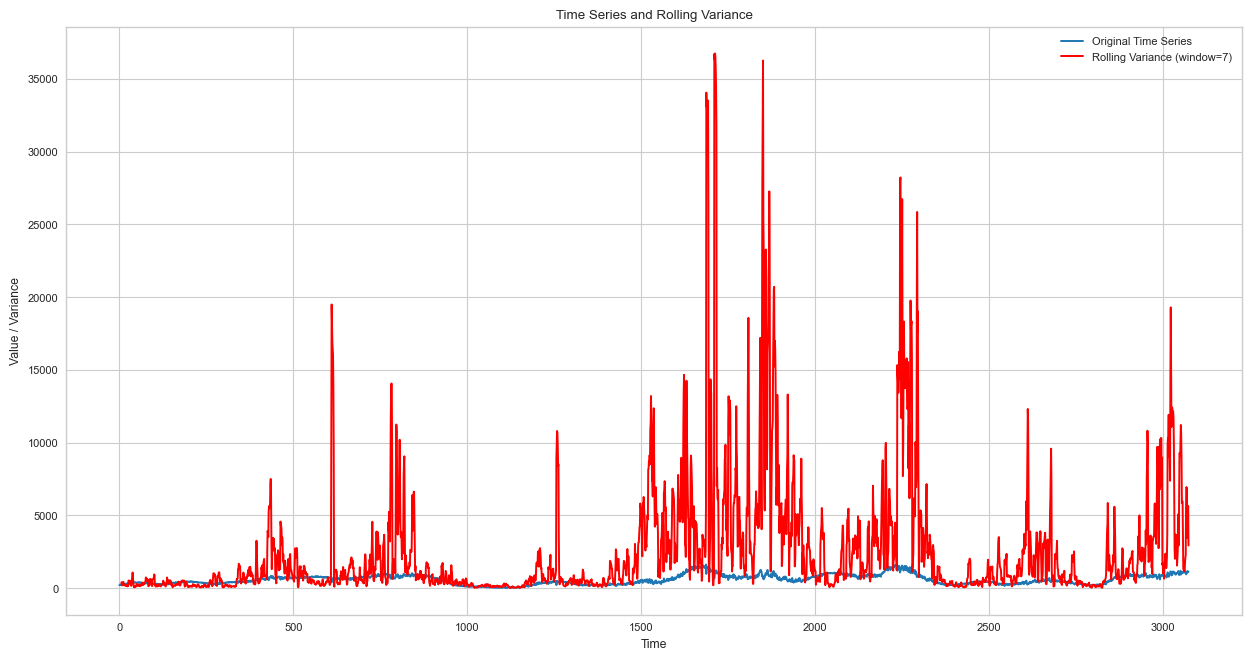

In [328]:
plt.figure(figsize=(12, 6))
plt.plot(df_merge_07['mean_total'], label='Original Time Series')
plt.plot(np.arange(window_size - 1, len(df_merge_07['mean_total'])), rolling_var, label=f'Rolling Variance (window={window_size})', color='red')
plt.xlabel('Time')
plt.ylabel('Value / Variance')
plt.title('Time Series and Rolling Variance')
plt.legend()
plt.show()

In [324]:
rolling_var

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
3069    6519.963067
3070    4006.651972
3071    5810.658069
3072    6581.088309
3073    3417.134654
Name: mean_total, Length: 3074, dtype: float64

In [209]:
df_merge.head()

,timestamp,mean_total,median_total,lower95,upper95,lower90,upper90,tents,tent_struc
0,2016-01-01,24.254,24.0,15.0,34.0,16.00,33.0,NaN,NaN
1,2016-01-02,30.204,30.0,21.0,41.0,22.00,40.0,NaN,NaN
2,2016-01-03,48.820,49.0,35.0,64.0,37.00,61.0,NaN,NaN
3,2016-01-04,52.268,52.0,37.0,68.0,40.00,65.0,NaN,NaN
4,2016-01-05,34.964,35.0,24.0,47.0,25.95,44.0,NaN,NaN


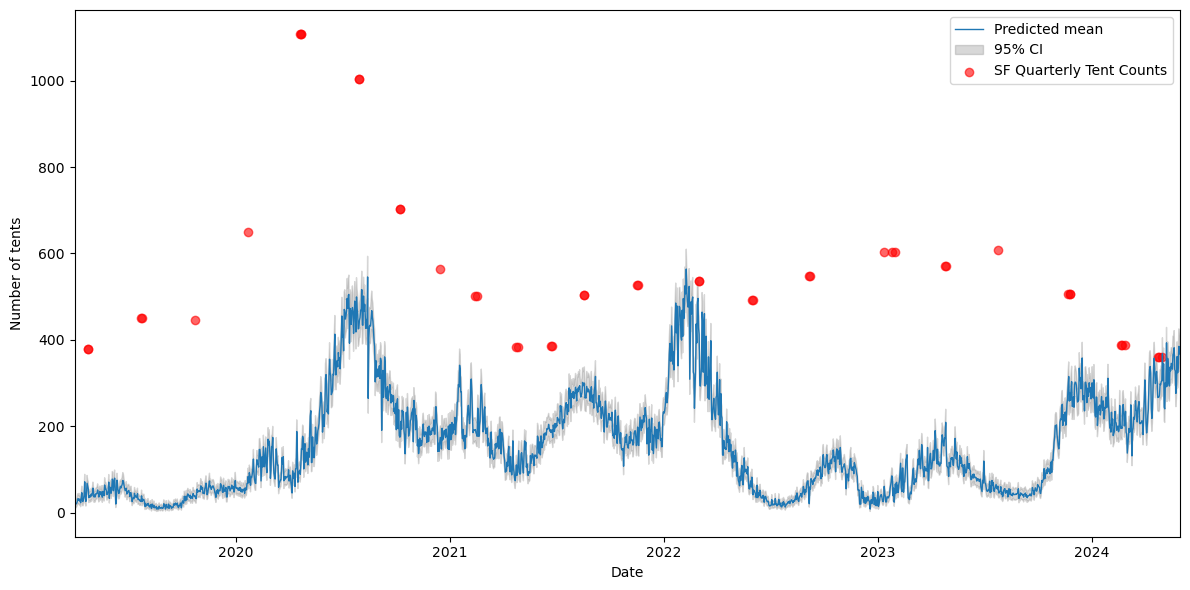

In [214]:
import datetime as dt
import statsmodels.api as sm

start_date = dt.datetime(2019, 4, 1)
end_date = dt.datetime(2024, 5, 31)

# Plot time-series
plt.figure(figsize=(12, 6))

# Predicted mean
plt.plot(
    df_merge['timestamp'], 
    df_merge['mean_total'], 
    label='Predicted mean', 
    linewidth=1
)

# Uncertainty band
plt.fill_between(
    df_merge['timestamp'],
    df_merge['lower95'],
    df_merge['upper95'],
    color='gray',
    alpha=0.3,
    label='95% CI'
)

plt.scatter(
    df_merge['timestamp'], 
    df_merge['tent_struc'], 
    label='SF Quarterly Tent Counts', 
    alpha=0.6, 
    marker='o',
    color='red'
)

plt.xlabel('Date')
plt.ylabel('Number of tents')
plt.legend()
#plt.ylim(0,100)
plt.xlim(start_date, end_date)

plt.tight_layout()
plt.show()

In [335]:
1500/365

4.109589041095891

In [319]:
1-np.exp(-0.7)

np.float64(0.5034146962085905)

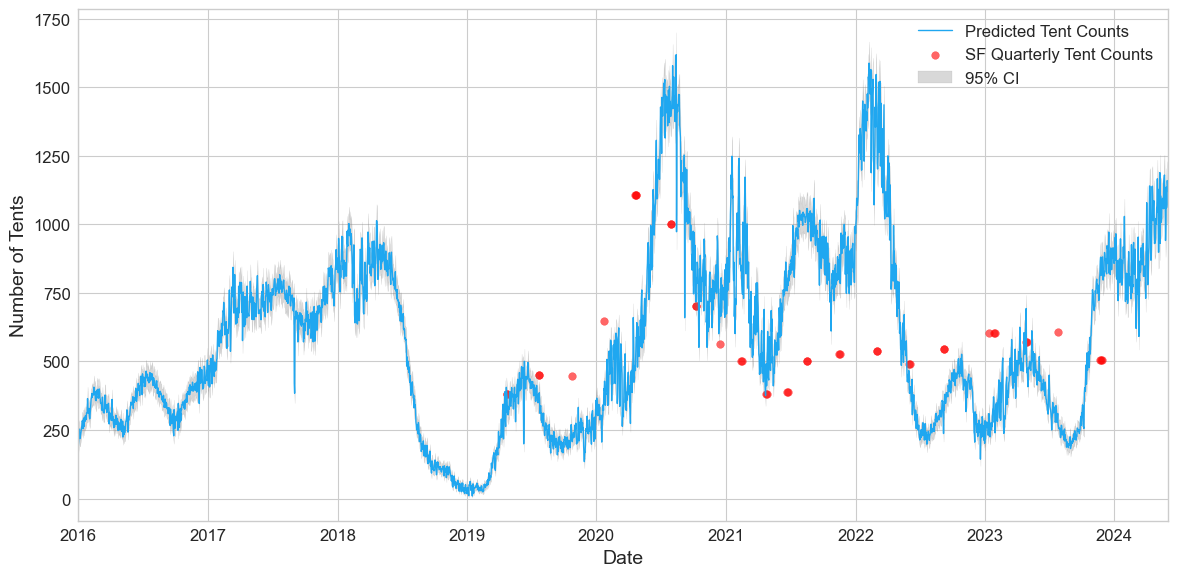

In [318]:
import datetime as dt
import statsmodels.api as sm

start_date = dt.datetime(2016, 1, 1)
end_date = dt.datetime(2024, 5, 31)

# Plot time-series
plt.figure(figsize=(12, 6))
plt.style.use('seaborn-v0_8-whitegrid')

# Predicted mean
plt.plot(
    df_merge_07['timestamp'], 
    df_merge_07['mean_total'], 
    label='Predicted Tent Counts', 
    color='#1FA7F0',
    linewidth=1
)

plt.scatter(
    df_merge_07['timestamp'], 
    df_merge_07['tent_struc'], 
    label='SF Quarterly Tent Counts', 
    alpha=0.6, 
    marker='o',
    color='red'
)

# Uncertainty band
plt.fill_between(
    df_merge_07['timestamp'],
    df_merge_07['lower95'],
    df_merge_07['upper95'],
    color='gray',
    alpha=0.3,
    label='95% CI'
)

plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Tents', fontsize=14)
plt.legend(fontsize=12)
#plt.ylim(0,100)
plt.xlim(start_date, end_date)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

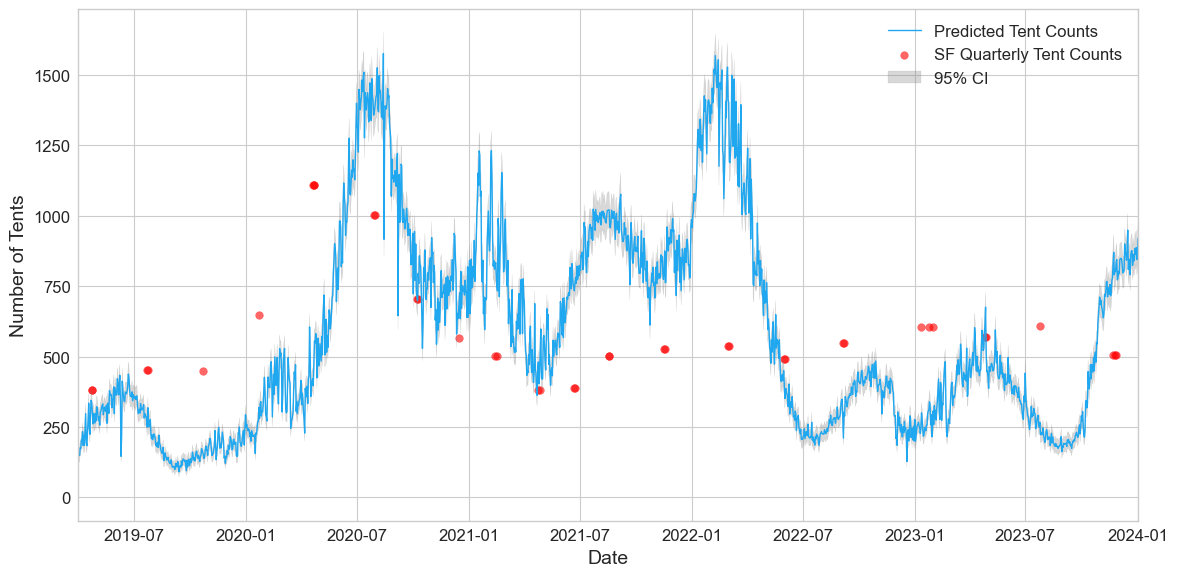

In [ ]:
import datetime as dt
import statsmodels.api as sm

start_date = dt.datetime(2019, 4, 1)
end_date = dt.datetime(2024, 1, 1)

# Plot time-series
plt.figure(figsize=(12, 6))
plt.style.use('seaborn-v0_8-whitegrid')

# Predicted mean
plt.plot(
    df_merge_07['timestamp'], 
    df_merge_07['mean_total'], 
    label='Predicted Tent Counts', 
    color='#1FA7F0',
    linewidth=1
)

plt.scatter(
    df_merge_07['timestamp'], 
    df_merge_07['tent_struc'], 
    label='SF Quarterly Tent Counts', 
    alpha=0.6, 
    marker='o',
    color='red'
)

# Uncertainty band
plt.fill_between(
    df_merge_07['timestamp'],
    df_merge_07['lower95'],
    df_merge_07['upper95'],
    color='gray',
    alpha=0.3,
    label='95% CI'
)

plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Tents', fontsize=14)
plt.legend(fontsize=12)
#plt.ylim(0,100)
plt.xlim(start_date, end_date)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

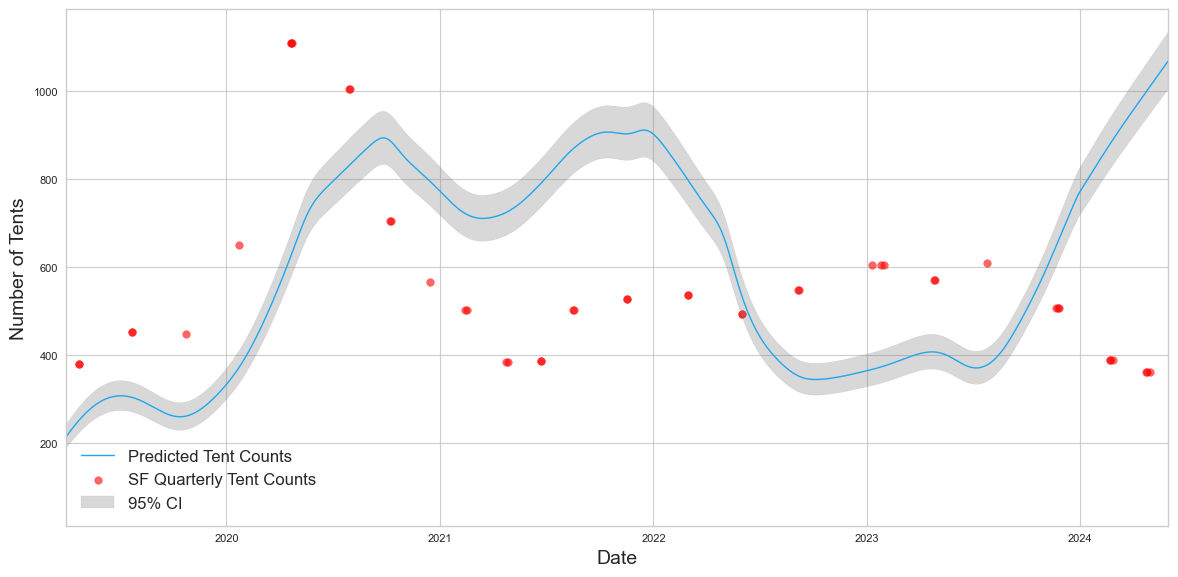

In [298]:
import datetime as dt
import statsmodels.api as sm

lowess_smoothed = sm.nonparametric.lowess(
    df_merge_07['mean_total'],
    df_merge_07['timestamp'].astype(int) / 10**9,
    frac=0.1,
    return_sorted=True
)

# Smooth uncertainty bands
df_merge_07['lower95_smoothed'] = sm.nonparametric.lowess(
    df_merge_07['lower95'],
    df_merge_07['timestamp'].astype(int) / 10**9,
    frac=0.1,
    return_sorted=False
)

df_merge_07['upper95_smoothed'] = sm.nonparametric.lowess(
    df_merge_07['upper95'],
    df_merge_07['timestamp'].astype(int) / 10**9,
    frac=0.1,
    return_sorted=False
)

df_merge_07['smoothed_count'] = lowess_smoothed[:, 1]

start_date = dt.datetime(2019, 4, 1)
end_date = dt.datetime(2024, 5, 31)

# Plot time-series
plt.figure(figsize=(12, 6))
plt.style.use('seaborn-v0_8-whitegrid')

# Predicted mean
plt.plot(
    df_merge_07['timestamp'], 
    df_merge_07['smoothed_count'], 
    label='Predicted Tent Counts', 
    color='#1FA7F0',
    linewidth=1
)

plt.scatter(
    df_merge_07['timestamp'], 
    df_merge_07['tent_struc'], 
    label='SF Quarterly Tent Counts', 
    alpha=0.6, 
    marker='o',
    color='red'
)

# Uncertainty band
plt.fill_between(
    df_merge_07['timestamp'],
    df_merge_07['lower95_smoothed'],
    df_merge_07['upper95_smoothed'],
    color='gray',
    alpha=0.3,
    label='95% CI'
)

plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Tents', fontsize=14)
plt.legend(fontsize=12)
#plt.ylim(0,100)
plt.xlim(start_date, end_date)

plt.tight_layout()
plt.show()

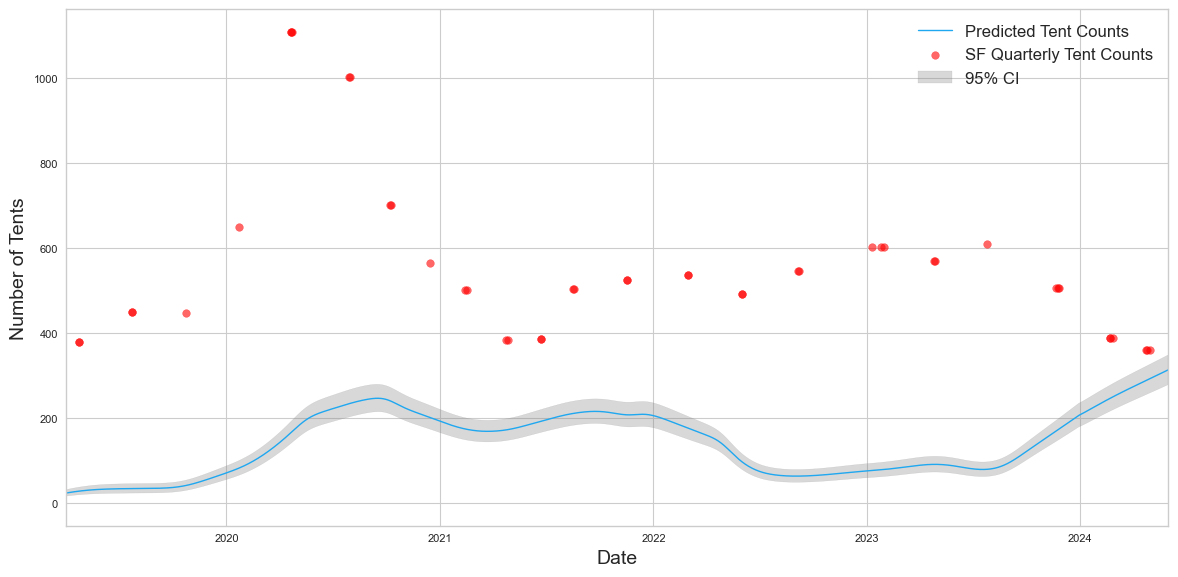

In [235]:
import datetime as dt
import statsmodels.api as sm

lowess_smoothed = sm.nonparametric.lowess(
    df_merge['mean_total'],
    df_merge['timestamp'].astype(int) / 10**9,
    frac=0.1,
    return_sorted=True
)

# Smooth uncertainty bands
df_merge['lower95_smoothed'] = sm.nonparametric.lowess(
    df_merge['lower95'],
    df_merge['timestamp'].astype(int) / 10**9,
    frac=0.1,
    return_sorted=False
)

df_merge['upper95_smoothed'] = sm.nonparametric.lowess(
    df_merge['upper95'],
    df_merge['timestamp'].astype(int) / 10**9,
    frac=0.1,
    return_sorted=False
)

df_merge['smoothed_count'] = lowess_smoothed[:, 1]

start_date = dt.datetime(2019, 4, 1)
end_date = dt.datetime(2024, 5, 31)

# Plot time-series
plt.figure(figsize=(12, 6))
plt.style.use('seaborn-v0_8-whitegrid')

# Predicted mean
plt.plot(
    df_merge['timestamp'], 
    df_merge['smoothed_count'], 
    label='Predicted Tent Counts', 
    color='#1FA7F0',
    linewidth=1
)

plt.scatter(
    df_merge['timestamp'], 
    df_merge['tent_struc'], 
    label='SF Quarterly Tent Counts', 
    alpha=0.6, 
    marker='o',
    color='red'
)

# Uncertainty band
plt.fill_between(
    df_merge['timestamp'],
    df_merge['lower95_smoothed'],
    df_merge['upper95_smoothed'],
    color='gray',
    alpha=0.3,
    label='95% CI'
)

plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Tents', fontsize=14)
plt.legend(fontsize=12)
#plt.ylim(0,100)
plt.xlim(start_date, end_date)

plt.tight_layout()
plt.show()

## Bounding-box level visualization

In [299]:
df_combined

,timestamp,bboxid,GEOID,count,median,var,lower95,upper95,lower90,upper90,category
0,2016-11-09,bbox_10_14,60750604002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,train
1,2016-11-10,bbox_10_14,60750604002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,train
2,2016-11-10,bbox_10_15,60750332043,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,train
3,2016-11-09,bbox_10_16,60750332043,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,train
4,2016-11-10,bbox_10_16,60750332043,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,train
...,...,...,...,...,...,...,...,...,...,...,...
13461041,2024-05-27,bbox_9_68,60750234002,0.974290,0.948660,1.026274,0.603338,1.491627,0.648857,1.386985,prediction
13461042,2024-05-28,bbox_9_68,60750234002,0.973247,0.947585,1.025243,0.602337,1.490723,0.647836,1.386027,prediction
13461043,2024-05-29,bbox_9_68,60750234002,0.979490,0.953550,1.032399,0.605513,1.501631,0.651358,1.395941,prediction
13461044,2024-05-30,bbox_9_68,60750234002,0.975889,0.950037,1.028425,0.603244,1.496195,0.648923,1.390874,prediction


In [252]:
df_combined

,timestamp,bboxid,GEOID,count,median,var,lower95,upper95,lower90,upper90,category
0,2016-11-09,bbox_10_14,60750604002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,train
1,2016-11-10,bbox_10_14,60750604002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,train
2,2016-11-10,bbox_10_15,60750332043,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,train
3,2016-11-09,bbox_10_16,60750332043,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,train
4,2016-11-10,bbox_10_16,60750332043,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,train
...,...,...,...,...,...,...,...,...,...,...,...
13461041,2024-05-27,bbox_9_68,60750234002,0.974290,0.948660,1.026274,0.603338,1.491627,0.648857,1.386985,prediction
13461042,2024-05-28,bbox_9_68,60750234002,0.973247,0.947585,1.025243,0.602337,1.490723,0.647836,1.386027,prediction
13461043,2024-05-29,bbox_9_68,60750234002,0.979490,0.953550,1.032399,0.605513,1.501631,0.651358,1.395941,prediction
13461044,2024-05-30,bbox_9_68,60750234002,0.975889,0.950037,1.028425,0.603244,1.496195,0.648923,1.390874,prediction


In [308]:
# Top 30 bboxid with most counts in training data
df_combined[df_combined['category']=='train'].groupby('bboxid').agg({'count':'sum'}).sort_values('count', ascending=False).head(100)

,count
bboxid,
bbox_41_43,3566.0
bbox_57_50,3213.0
bbox_51_56,2824.0
bbox_57_49,2458.0
bbox_54_49,2252.0
...,...
bbox_57_66,766.0
bbox_52_55,752.0
bbox_38_46,751.0


In [263]:
df_combined.head()

,timestamp,bboxid,GEOID,count,median,var,lower95,upper95,lower90,upper90,category
0,2016-11-09,bbox_10_14,60750604002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,train
1,2016-11-10,bbox_10_14,60750604002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,train
2,2016-11-10,bbox_10_15,60750332043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,train
3,2016-11-09,bbox_10_16,60750332043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,train
4,2016-11-10,bbox_10_16,60750332043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,train


In [301]:
df_4143 = df_combined[df_combined['bboxid'] == 'bbox_41_43'].copy()
df_4143['timestamp'] = pd.to_datetime(df_4143['timestamp'])
df_4143.shape

(3074, 11)

In [302]:
df_5849 = df_combined[df_combined['bboxid'] == 'bbox_41_43'].copy()
df_5849['timestamp'] = pd.to_datetime(df_5849['timestamp'])
df_5849.shape

(3074, 11)

In [303]:
df_4143[df_4143['category']=='train']['timestamp'].nunique()

1616

In [304]:
df_4143[df_4143['category']=='prediction']['timestamp'].nunique()

1458

In [305]:
df_4143.head(40)

,timestamp,bboxid,GEOID,count,median,var,lower95,upper95,lower90,upper90,category
59769,2016-01-01,bbox_41_43,60750203003,1.0,1.0,0.0,1.0,1.0,1.0,1.0,train
59770,2016-01-02,bbox_41_43,60750203003,1.0,1.0,0.0,1.0,1.0,1.0,1.0,train
59771,2016-01-03,bbox_41_43,60750203003,2.0,2.0,0.0,2.0,2.0,2.0,2.0,train
59772,2016-01-04,bbox_41_43,60750203003,3.0,3.0,0.0,3.0,3.0,3.0,3.0,train
59773,2016-01-05,bbox_41_43,60750203003,2.0,2.0,0.0,2.0,2.0,2.0,2.0,train
59774,2016-01-06,bbox_41_43,60750203003,1.0,1.0,0.0,1.0,1.0,1.0,1.0,train
59775,2016-01-07,bbox_41_43,60750203003,1.0,1.0,0.0,1.0,1.0,1.0,1.0,train
59776,2016-01-08,bbox_41_43,60750203003,4.0,4.0,0.0,4.0,4.0,4.0,4.0,train
59777,2016-01-09,bbox_41_43,60750203003,1.0,1.0,0.0,1.0,1.0,1.0,1.0,train
59778,2016-01-10,bbox_41_43,60750203003,1.0,1.0,0.0,1.0,1.0,1.0,1.0,train


In [273]:
df_4143.head(40)

,timestamp,bboxid,GEOID,count,median,var,lower95,upper95,lower90,upper90,category
59769,2016-01-01,bbox_41_43,60750203003,1.0,0.0,0.0,0.0,0.0,0.0,0.0,train
59770,2016-01-02,bbox_41_43,60750203003,1.0,0.0,0.0,0.0,0.0,0.0,0.0,train
59771,2016-01-03,bbox_41_43,60750203003,2.0,0.0,0.0,0.0,0.0,0.0,0.0,train
59772,2016-01-04,bbox_41_43,60750203003,3.0,0.0,0.0,0.0,0.0,0.0,0.0,train
59773,2016-01-05,bbox_41_43,60750203003,2.0,0.0,0.0,0.0,0.0,0.0,0.0,train
59774,2016-01-06,bbox_41_43,60750203003,1.0,0.0,0.0,0.0,0.0,0.0,0.0,train
59775,2016-01-07,bbox_41_43,60750203003,1.0,0.0,0.0,0.0,0.0,0.0,0.0,train
59776,2016-01-08,bbox_41_43,60750203003,4.0,0.0,0.0,0.0,0.0,0.0,0.0,train
59777,2016-01-09,bbox_41_43,60750203003,1.0,0.0,0.0,0.0,0.0,0.0,0.0,train
59778,2016-01-10,bbox_41_43,60750203003,1.0,0.0,0.0,0.0,0.0,0.0,0.0,train


In [306]:
df_4143[df_4143['category'] == 'prediction']

,timestamp,bboxid,GEOID,count,median,var,lower95,upper95,lower90,upper90,category
4282779,2016-01-16,bbox_41_43,60750203003,1.662374,1.659030,1.673525,1.464995,1.878764,1.494575,1.841581,prediction
4282780,2016-01-30,bbox_41_43,60750203003,1.682209,1.678876,1.693455,1.483924,1.899441,1.513656,1.862131,prediction
4282781,2016-01-31,bbox_41_43,60750203003,1.670579,1.667239,1.681769,1.472826,1.887316,1.502468,1.850081,prediction
4282782,2016-02-01,bbox_41_43,60750203003,1.670536,1.667184,1.681768,1.472429,1.887699,1.502121,1.850386,prediction
4282783,2016-02-05,bbox_41_43,60750203003,1.713725,1.710362,1.725287,1.512631,1.933941,1.542794,1.896130,prediction
...,...,...,...,...,...,...,...,...,...,...,...
10830820,2024-05-27,bbox_41_43,60750203003,1.895375,1.887205,1.926548,1.572889,2.264333,1.619623,2.198996,prediction
10830821,2024-05-28,bbox_41_43,60750203003,1.904511,1.896257,1.936158,1.579648,2.276325,1.626713,2.210465,prediction
10830822,2024-05-29,bbox_41_43,60750203003,1.932899,1.924417,1.965906,1.601280,2.312763,1.649291,2.245437,prediction
10830823,2024-05-30,bbox_41_43,60750203003,1.925954,1.917472,1.958842,1.594977,2.305174,1.642886,2.237951,prediction


In [271]:
df_4143[df_4143['category'] == 'prediction']

,timestamp,bboxid,GEOID,count,median,var,lower95,upper95,lower90,upper90,category
4282779,2016-01-16,bbox_41_43,60750203003,1.662374,1.659030,1.673525,1.464995,1.878764,1.494575,1.841581,prediction
4282780,2016-01-30,bbox_41_43,60750203003,1.682209,1.678876,1.693455,1.483924,1.899441,1.513656,1.862131,prediction
4282781,2016-01-31,bbox_41_43,60750203003,1.670579,1.667239,1.681769,1.472826,1.887316,1.502468,1.850081,prediction
4282782,2016-02-01,bbox_41_43,60750203003,1.670536,1.667184,1.681768,1.472429,1.887699,1.502121,1.850386,prediction
4282783,2016-02-05,bbox_41_43,60750203003,1.713725,1.710362,1.725287,1.512631,1.933941,1.542794,1.896130,prediction
...,...,...,...,...,...,...,...,...,...,...,...
10830820,2024-05-27,bbox_41_43,60750203003,1.895375,1.887205,1.926548,1.572889,2.264333,1.619623,2.198996,prediction
10830821,2024-05-28,bbox_41_43,60750203003,1.904511,1.896257,1.936158,1.579648,2.276325,1.626713,2.210465,prediction
10830822,2024-05-29,bbox_41_43,60750203003,1.932899,1.924417,1.965906,1.601280,2.312763,1.649291,2.245437,prediction
10830823,2024-05-30,bbox_41_43,60750203003,1.925954,1.917472,1.958842,1.594977,2.305174,1.642886,2.237951,prediction


In [278]:
df_4143.sort_values('timestamp', inplace=True)

In [309]:
df_3946 = df_combined[df_combined['bboxid'] == 'bbox_39_46'].copy()
df_3946['timestamp'] = pd.to_datetime(df_3946['timestamp'])
df_3946.shape

(3074, 11)

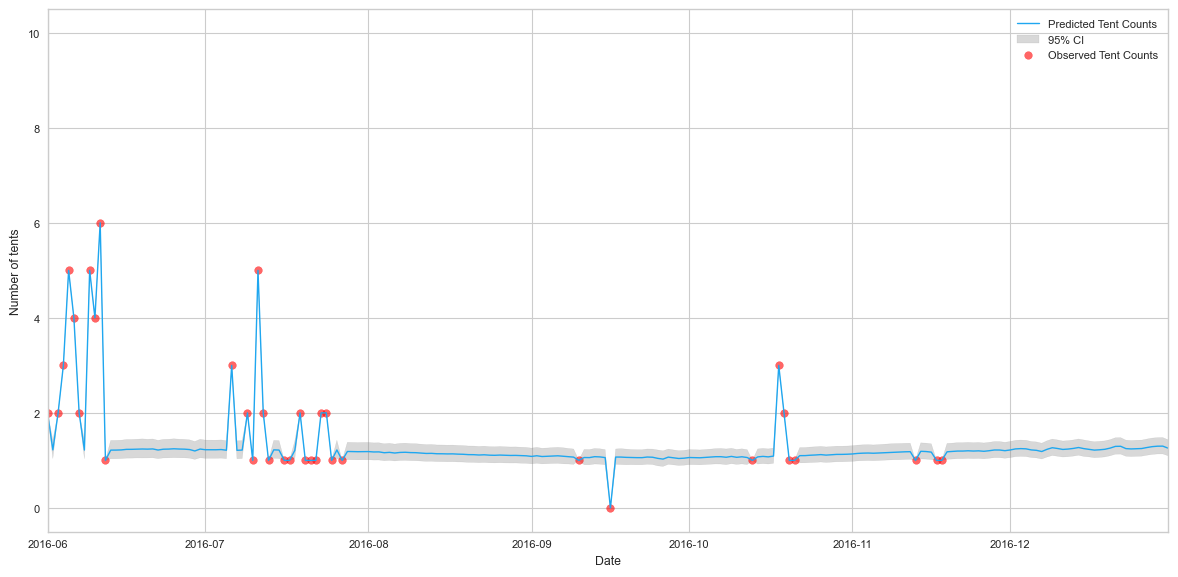

In [313]:
df_3946.sort_values('timestamp', inplace=True)
start_date = dt.datetime(2016, 6, 1)
end_date = dt.datetime(2016, 12, 31)

# Plot time-series
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 6))

# Predicted mean
plt.plot(
    df_3946['timestamp'], 
    df_3946['count'], 
    label='Predicted Tent Counts', 
    color='#1FA7F0',
    linewidth=1
)

# Uncertainty band
plt.fill_between(
    df_3946['timestamp'],
    df_3946['lower95'],
    df_3946['upper95'],
    color='gray',
    alpha=0.3,
    label='95% CI'
)

plt.scatter(
    df_3946[df_3946['category'] == 'train']['timestamp'], 
    df_3946[df_3946['category'] == 'train']['count'], 
    label='Observed Tent Counts', 
    alpha=0.6, 
    marker='o',
    color='red'
)

plt.xlabel('Date')
plt.ylabel('Number of tents')
plt.xlim(start_date, end_date)
plt.legend()
plt.tight_layout()
plt.show()

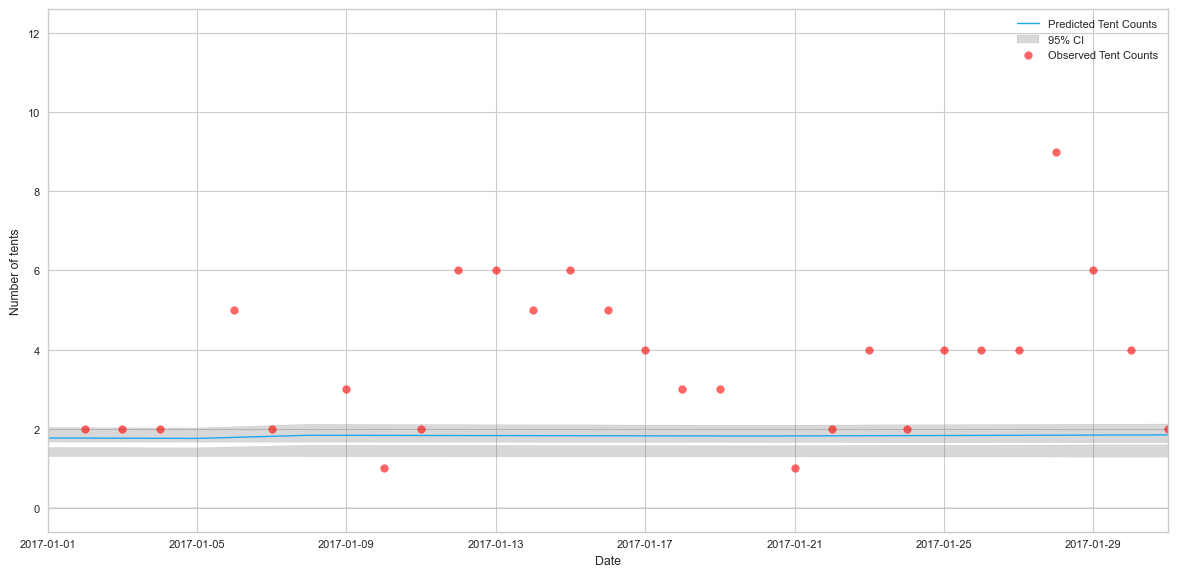

In [270]:
start_date = dt.datetime(2017, 1, 1)
end_date = dt.datetime(2017, 1, 31)

# Plot time-series
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 6))

# Predicted mean
plt.plot(
    df_5849[df_5849['category']=='prediction']['timestamp'], 
    df_5849[df_5849['category']=='prediction']['count'], 
    label='Predicted Tent Counts', 
    color='#1FA7F0',
    linewidth=1
)

# Uncertainty band
plt.fill_between(
    df_5849['timestamp'],
    df_5849['lower95'],
    df_5849['upper95'],
    color='gray',
    alpha=0.3,
    label='95% CI'
)

plt.scatter(
    df_5849[df_5849['category'] == 'train']['timestamp'], 
    df_5849[df_5849['category'] == 'train']['count'], 
    label='Observed Tent Counts', 
    alpha=0.6, 
    marker='o',
    color='red'
)

plt.xlabel('Date')
plt.ylabel('Number of tents')
plt.xlim(start_date, end_date)
plt.legend()
plt.tight_layout()
plt.show()

In [243]:
df_test

,timestamp,bboxid,GEOID,geometry_bbox,center_latlon,max,min,precipitation,total_population,white_ratio,black_ratio,hh_median_income,ground_truth,latitude,longitude,count,var,median,lower95,upper95,lower90,upper90,category
0,2016-01-01,bbox_10_14,60750604002,POLYGON ((-122.4862707014277 37.71914041535512...,"(37.71986168151697, -122.48535268128838)",50.0,40.0,0.00,506,0.806324,0.00000,53438.0,NaN,37.719862,-122.485353,0.310425,0.315912,0.301948,0.190381,0.478896,0.205029,0.444681,prediction
1,2016-01-02,bbox_10_14,60750604002,POLYGON ((-122.4862707014277 37.71914041535512...,"(37.71986168151697, -122.48535268128838)",51.0,45.0,0.00,506,0.806324,0.00000,53438.0,NaN,37.719862,-122.485353,0.313547,0.319135,0.304999,0.192381,0.483543,0.207170,0.449024,prediction
2,2016-01-03,bbox_10_14,60750604002,POLYGON ((-122.4862707014277 37.71914041535512...,"(37.71986168151697, -122.48535268128838)",55.0,46.0,0.02,506,0.806324,0.00000,53438.0,NaN,37.719862,-122.485353,0.318567,0.324327,0.309893,0.195526,0.491157,0.210546,0.456117,prediction
3,2016-01-04,bbox_10_14,60750604002,POLYGON ((-122.4862707014277 37.71914041535512...,"(37.71986168151697, -122.48535268128838)",57.0,47.0,0.09,506,0.806324,0.00000,53438.0,NaN,37.719862,-122.485353,0.320279,0.326096,0.311567,0.196625,0.493700,0.211723,0.458495,prediction
4,2016-01-05,bbox_10_14,60750604002,POLYGON ((-122.4862707014277 37.71914041535512...,"(37.71986168151697, -122.48535268128838)",54.0,50.0,1.18,506,0.806324,0.00000,53438.0,NaN,37.719862,-122.485353,0.313515,0.319091,0.304984,0.192454,0.483310,0.207235,0.448840,prediction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13189049,2024-05-27,bbox_9_68,60750234002,POLYGON ((-122.38767944786734 37.7172190397561...,"(37.71793953055515, -122.38676050605784)",64.0,52.0,0.00,1517,0.187871,0.13909,29442.0,NaN,37.717940,-122.386761,0.974290,1.026274,0.948660,0.603338,1.491627,0.648857,1.386985,prediction
13189050,2024-05-28,bbox_9_68,60750234002,POLYGON ((-122.38767944786734 37.7172190397561...,"(37.71793953055515, -122.38676050605784)",67.0,54.0,0.00,1517,0.187871,0.13909,29442.0,NaN,37.717940,-122.386761,0.973247,1.025243,0.947585,0.602337,1.490723,0.647836,1.386027,prediction
13189051,2024-05-29,bbox_9_68,60750234002,POLYGON ((-122.38767944786734 37.7172190397561...,"(37.71793953055515, -122.38676050605784)",76.0,53.0,0.00,1517,0.187871,0.13909,29442.0,NaN,37.717940,-122.386761,0.979490,1.032399,0.953550,0.605513,1.501631,0.651358,1.395941,prediction
13189052,2024-05-30,bbox_9_68,60750234002,POLYGON ((-122.38767944786734 37.7172190397561...,"(37.71793953055515, -122.38676050605784)",74.0,54.0,0.00,1517,0.187871,0.13909,29442.0,NaN,37.717940,-122.386761,0.975889,1.028425,0.950037,0.603244,1.496195,0.648923,1.390874,prediction
